<a href="https://colab.research.google.com/github/skyler14/ICIAR-histology/blob/master/Edge%20Detection%20and%20Hough%20Circle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cell Detection

Hough Circle transform managed to come through on the 11th hour and provide detection results. Currently still trying to figure out a reliable method by which to tune the maximum number of circles detected because at the target size it is biased to selecting the maximum number of circles.

(438, 584)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


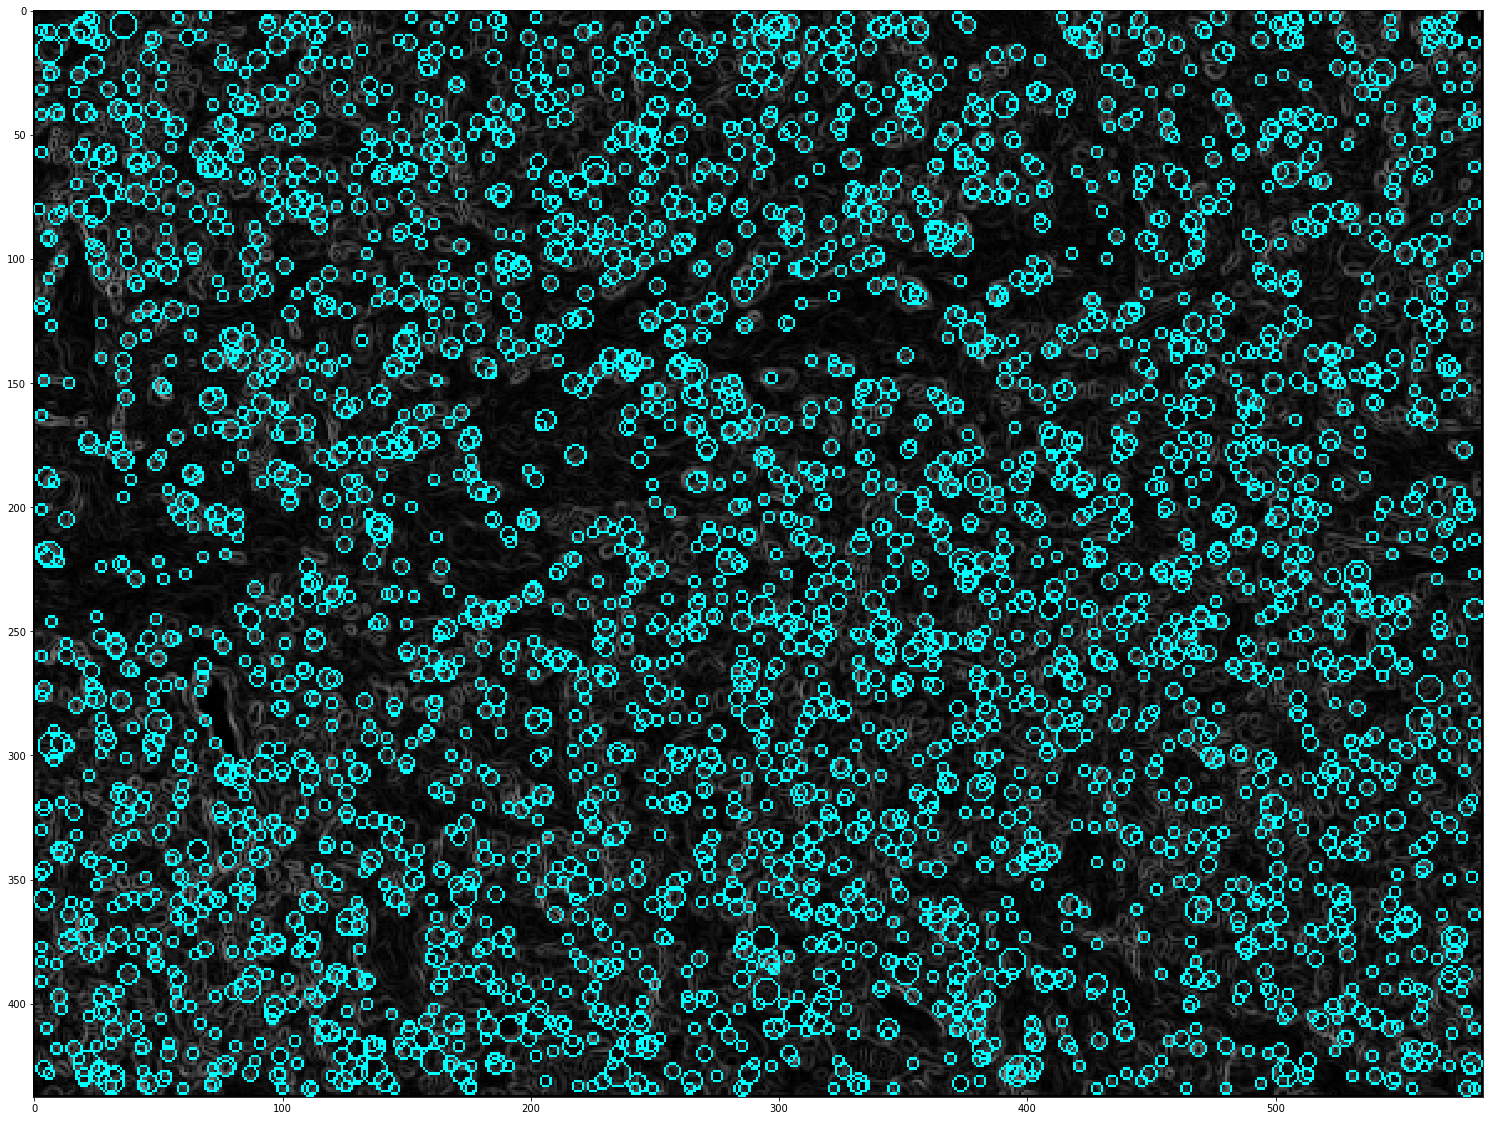

In [8]:
# reference code from local computations
# !pip install scikit-image

import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from PIL import Image
import requests
from io import BytesIO

from skimage import feature
from skimage.filters import roberts, sobel, sobel_h, sobel_v, scharr, scharr_h, scharr_v, prewitt, prewitt_v, prewitt_h, frangi, gabor, gaussian, hessian, laplace, meijering, wiener

from skimage import data, color
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte

def edge_transformer(img,alg=gaussian):
    return(alg(img))

#farid_v, farid_h, \
req = requests.get('https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ficiar2018-challenge.grand-challenge.org%2Fmedia%2FICIAR2018-Challenge%2Fpublic_html%2Finvasive.png%2F&f=1&nofb=1')
# https://i.stack.imgur.com/Ye3gs.png
# https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ficiar2018-challenge.grand-challenge.org%2Fmedia%2FICIAR2018-Challenge%2Fpublic_html%2Fin_situ.png%2F&f=1&nofb=1
# https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ficiar2018-challenge.grand-challenge.org%2Fmedia%2FICIAR2018-Challenge%2Fpublic_html%2Fbenign.png%2F&f=1&nofb=1
# https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ficiar2018-challenge.grand-challenge.org%2Fmedia%2FICIAR2018-Challenge%2Fpublic_html%2Fnormal.png%2F&f=1&nofb=1

img = Image.open(BytesIO(req.content)).convert('L')

# im = ndi.rotate(im, 15, mode='constant')
# im = ndi.gaussian_filter(im, 4)
# im += 0.2 * np.random.random(im.shape)

im = np.array(img)
print(im.shape)

edges = [roberts, sobel, scharr] 
analysis = [edge_transformer(im,edges[i]) for i,_ in enumerate(edges)]
# print(len(analysis))  


ax=[0 for i in range(len(edges))]

# choose scharr
image=analysis[2]
hough_radii = np.arange(2, 6, 1)
hough_res = hough_circle(canny(image), hough_radii)

# Select the most prominent 3 circles
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,min_xdistance=5,min_ydistance=5,
                                           total_num_peaks=3000)

# Draw them
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(50, 20))
image = color.gray2rgb(analysis[1])
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius,
                                    shape=image.shape)
    image[circy, circx] = (0, 20, 20)

ax.imshow(image, cmap=plt.cm.gray)
# ax.imshow(image, cmap=plt.cm.gray)

# for i,a in enumerate(ax):
#     a.imshow(edge_transformer(analysis[i]), cmap=plt.cm.gray)
#     a.axis('off')
#     a.set_title(edges[i].__name__+" filter", fontsize=20)